In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
    
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df=pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID") 

merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice in the DataFrame.
Trial_Count=len(merge_df["Mouse ID"].unique())

print(f"The total number of experiments ran in this study is {Trial_Count}.")

The total number of experiments ran in this study is 249.


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

#Looking at the data for this duplicate result, to confirm it's validity.
test=merge_df[merge_df["Mouse ID"]== 'g989'] 

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df[merge_df["Mouse ID"].isin(duplicate_mouse) == False]

clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
# Checking the number of mice in the clean DataFrame.
Mouse_Count=len(clean_df["Mouse ID"].unique())

print(f"The total number of mice used in this study is {Mouse_Count}.")

The total number of mice used in this study is 248.


In [31]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Making a new DF
mr_df=clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean=mr_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=mr_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=mr_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd=mr_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=mr_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

analysis_df=pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance, "SD": sd, "SEM": sem})


# Formatting
analysis_df=analysis_df.round(2)

analysis_df

,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


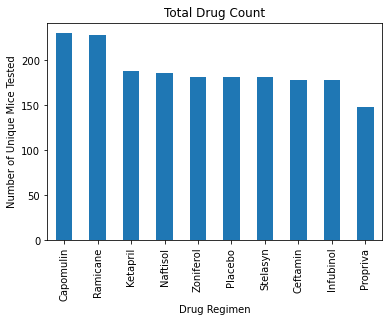

In [14]:
#Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
drug_counts=clean_df["Drug Regimen"].value_counts()
y_axis=drug_counts.values
x_axis=drug_counts.index

#Need to be DataFrame.plot
drug_counts.plot(kind="bar")

#Formatting
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")
plt.title("Total Drug Count")
plt.xticks(rotation=90)
plt.show()

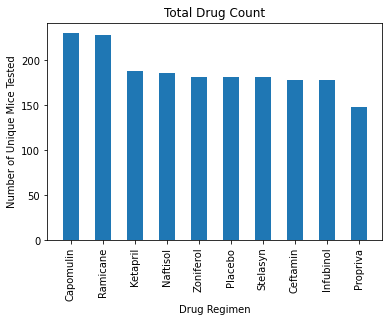

In [15]:
# Generate a bar plot showing the number of mice per time point for each drug regimne throughout the course of the study using pyplot.
drug_counts= clean_df["Drug Regimen"].value_counts()

#Creating variables for my axis
y_axis=drug_counts.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=drug_counts.index
                 
#Needs to be matplotlib
plt.bar(x_drugs, y_axis, align= "center", width= .5)

#Formatting
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")
plt.title("Total Drug Count")
plt.xticks(rotation=90)

plt.show()

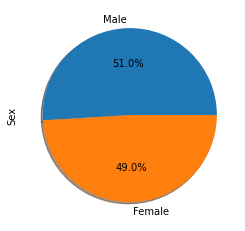

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using matplot
mf_count=clean_df["Sex"].value_counts()

#Labels for each section
labels=mf_count.index

#Values of each section 
sizes=mf_count.values

#Using Pandas to print

plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=0)

#Formatting
plt.ylabel("Sex")
plt.show()

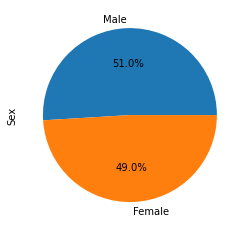

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = clean_df["Sex"].value_counts()
mouse_gender.plot(kind="pie", autopct="%1.1f%%")
plt.title("")
plt.show()


In [18]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
max_tumor=clean_df.groupby("Mouse ID").max().reset_index()

merge_data=max_tumor[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')

merge_data.round(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.97,2,Infubinol,Female,20,23
1,a251,45,65.53,1,Infubinol,Female,21,25
2,a262,45,70.72,4,Placebo,Female,17,29
3,a275,45,63.00,3,Ceftamin,Female,20,28
4,a366,30,63.44,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.71,0,Propriva,Female,12,26
244,z578,45,30.64,0,Ramicane,Male,11,16
245,z581,45,62.75,3,Infubinol,Female,24,25
246,z795,45,65.74,3,Naftisol,Female,13,29


In [19]:
# 4 regis: Capomulin, Ramicane, Infubinol, Ceftamin
capomulin= merge_data.loc[merge_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merge_data.loc[merge_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merge_data.loc[merge_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merge_data.loc[merge_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

#Capomulin quartiles
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap
#Infubionol Outliers
lower_ocap= lower_cap-(1.5*iqr)
upper_ocap= upper_cap+(1.5*iqr)

print(f"The IQR for Capomulin is: {round(iqr, 2)}")
print(f"This is the lower bound for Capomulin {round(lower_ocap, 2)} values below this are considered an outliers")
print(f"This is the upper bound for Capomulin {round(upper_ocap, 2)} values above this are considered an outliers")

The IQR for Capomulin is: 7.78
This is the lower bound for Capomulin 20.7 values below this are considered an outliers
This is the upper bound for Capomulin 51.83 values above this are considered an outliers


In [20]:
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr= upper_ram-lower_ram
#Ramicane Outliers
lower_oram= lower_ram-(1.5*iqr)
upper_oram= upper_ram+(1.5*iqr)

print(f"The IQR for Ramicane is: {round(iqr, 2)}")
print(f"This is the lower bound for Ramicane {round(lower_oram, 2)} values below this are considered an outliers")
print(f"This is the upper bound for Ramicane {round(upper_oram, 2)} values above this are considered an outliers")

The IQR for Ramicane is: 9.1
This is the lower bound for Ramicane 17.91 values below this are considered an outliers
This is the upper bound for Ramicane 54.31 values above this are considered an outliers


In [21]:
#Infubionol quartiles
quartile_in=infubinol.quantile([.25,.5,.75])
lower_in= quartile_in[.25]
upper_in=quartile_in[.75]
iqr= upper_in-lower_in
#Infubionol Outliers
lower_oin= lower_in-(1.5*iqr)
upper_oin= upper_in+(1.5*iqr)

print(f"The IQR for Infubinol is: {round(iqr, 2)}")
print(f"This is the lower bound for Infubinol {round(lower_oin, 2)} values below this are considered an outliers")
print(f"This is the upper bound for Infubinol {round(upper_oin, 2)} values above this are considered an outliers")

The IQR for Infubinol is: 11.48
This is the lower bound for Infubinol 36.83 values below this are considered an outliers
This is the upper bound for Infubinol 82.74 values above this are considered an outliers


In [22]:
#Ceftamin quartiles
quartile_ce=ceftamin.quantile([.25,.5,.75])
lower_ce= quartile_ce[.25]
upper_ce=quartile_ce[.75]
iqr= upper_ce-lower_ce
#Ceftamin Outliers
lower_oce= lower_ce-(1.5*iqr)
upper_oce= upper_ce+(1.5*iqr)

print(f"The IQR for Ceftamin is: {round(iqr, 2)}")
print(f"This is the lower bound for Ceftamin {round(lower_oce, 2)} values below this are considered an outliers")
print(f"This is the upper bound for Ceftamin {round(upper_oce, 2)} values above this are considered an outliers")

The IQR for Ceftamin is: 15.58
This is the lower bound for Ceftamin 25.36 values below this are considered an outliers
This is the upper bound for Ceftamin 87.67 values above this are considered an outliers


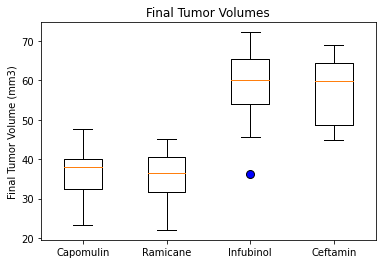

In [23]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='b', markersize=8)

#Make Box Plot
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops= orange_out)

#Formatting
plt.title("Final Tumor Volumes")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

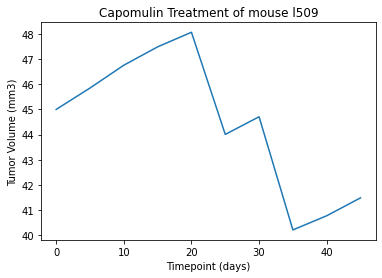

In [24]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_table= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse= clean_df.loc[clean_df['Mouse ID'] == 'l509']

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse l509")
plt.show()

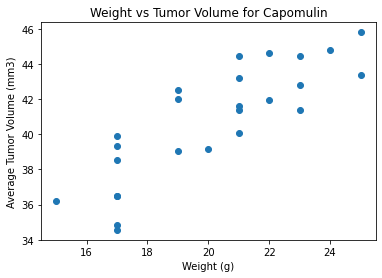

In [25]:
#Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_weight= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

cap_avg=capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

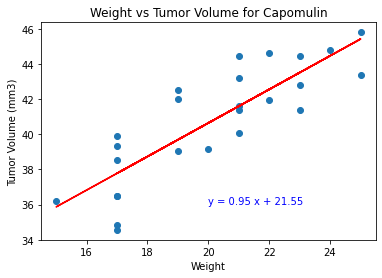

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values=cap_avg["Weight (g)"]* slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.annotate(line_eq,(20,36), color='b', fontsize=10)
plt.show()

In [27]:
 print(f"The correlation between mouse weight and average tumor volume is {round(rvalue,2)}")

The correlation between mouse weight and average tumor volume is 0.84
